In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("Filepath.csv")
test = pd.read_csv("Filepath.csv")

In [4]:
print(train.shape)
print(test.shape)

(6922, 82)
(2308, 82)


In [5]:
train.drop("Unnamed: 0", axis = 1, inplace = True)
test.drop("Unnamed: 0", axis = 1, inplace = True)

In [6]:
train.sample(frac = 0.1).reset_index().drop("index", axis = 1, inplace = True)
test.sample(frac = 0.1).reset_index().drop("index", axis = 1, inplace = True)

In [7]:
x_train = train.drop("Converted", axis = 1)
y_train = train.iloc[:, -1]
x_test = test.drop("Converted", axis = 1)
y_test = test.iloc[:, -1]

In [8]:
pd.set_option('display.max_columns', 500)

In [9]:
x_train.head()

,Tags_Will revert after reading the email,Total Time Spent on Website,Last Notable Activity_SMS Sent,Lead Profile_Potential Lead,Lead Origin_Lead Add Form,Last Activity_SMS Sent,What is your current occupation_Working Professional,Lead Profile_Unspecified,Lead Source_Reference,Tags_Interested in other courses,Tags_Ringing,What is your current occupation_Unemployed,Tags_Closed by Horizzon,Last Notable Activity_Modified,Last Activity_Olark Chat Conversation,Do Not Email_Yes,Tags_Not doing further education,Lead Source_Welingak Website,TotalVisits,Specialization_Unspecified,Last Activity_Converted to Lead,Lead Source_Direct Traffic,Lead Source_Facebook,Tags_switched off,Last Notable Activity_Email Marked Spam,Specialization_Services Excellence,Tags_Shall take in the next coming month,Lead Origin_Lead Import,Lead Profile_Lateral Student,Tags_In confusion whether part time or DLP,What is your current occupation_Housewife,Lead Source_bing,Last Activity_Page Visited on Website,Tags_Lateral student,Lead Origin_Landing Page Submission,Last Activity_Unsubscribed,Lead Source_Others,Last Notable Activity_Email Bounced,Specialization_Operations Management,Page Views Per Visit,Tags_invalid number,Lead Origin_Quick Add Form,What is your current occupation_Other,Last Activity_Email Link Clicked,Last Activity_Visited Booth in Tradeshow,Tags_Interested in Next batch,Lead Source_Referral Sites,Tags_Still Thinking,Last Activity_Email Bounced,Tags_Recognition issue (DEC approval),City_Unspecified,How did you hear about X Education_Multiple Sources,Tags_Graduation in progress,Tags_Lost to Others,Tags_Busy,Last Activity_Resubscribed to emails,Lead Source_Pay per Click Ads,Specialization_Human Resource Management,City_Other Metro Cities,Last Notable Activity_Unreachable,Last Notable Activity_Email Opened,Last Activity_View in browser link Clicked,Specialization_E-COMMERCE,Tags_Interested in full time MBA,Lead Source_Olark Chat,Lead Source_WeLearn,Specialization_Business Administration,Lead Source_Press_Release,Last Notable Activity_View in browser link Clicked,City_Other Cities,What matters most to you in choosing a course_Flexibility & Convenience,Tags_Diploma holder (Not Eligible),Tags_wrong number given,Lead Profile_Student of SomeSchool,Last Activity_Unreachable,A free copy of Mastering The Interview_Yes,City_Other Cities of Maharashtra,How did you hear about X Education_Email,Last Activity_Email Marked Spam,Last Activity_Form Submitted on Website
0,0,2.634313,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,-0.105605,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.312899,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,-0.890436,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,-0.940374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.133384,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,-0.341290,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,-0.105605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.169195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,-0.890436,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,-0.940374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.133384,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,-0.890436,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,-0.940374,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.133384,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
ct = ColumnTransformer([('se', StandardScaler(), ['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits'])], remainder='passthrough')

In [11]:
random_forest_pipeline = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(random_state = 42))])
adaboost_pipeline = Pipeline([('transformer', ct), ('Adaboost', AdaBoostClassifier(random_state = 42))])
ExtraTree_pipeline = Pipeline([('transformer', ct), ('ExtraTreeClassifier', ExtraTreesClassifier(random_state = 42))])
BaggingClassifier_pipeline = Pipeline([('transformer', ct), ('BaggingClassifier', BaggingClassifier(estimator = DecisionTreeClassifier(), random_state = 42))])
GradientBoost_pipeline = Pipeline([('transformer', ct), ('GradientBoosting', GradientBoostingClassifier(random_state = 42))])
dtree_pipeline = Pipeline([('transformer', ct), ('DecisionTree', DecisionTreeClassifier(random_state = 42))])
knn_pipeline = Pipeline([('transformer', ct), ('KNN', KNeighborsClassifier())])
lr_pipeline = Pipeline([('transformer', ct), ('LogisticRegression', LogisticRegression(random_state = 42))])
sgd_pipeline = Pipeline([('transformer', ct), ('StochasticGradient', SGDClassifier(random_state = 42))])
mlp_pipeline = Pipeline([('transformer', ct), ('MLPClassifier', MLPClassifier(random_state = 42))])
naive_pipeline = Pipeline([('transformer', ct), ('NaiveBayes', GaussianNB())])
svc_pipeline = Pipeline([('transformer', ct), ('SVM', SVC(random_state = 42))])
lightgbm_pipeline = Pipeline([('transformer', ct), ('lightgbm', LGBMClassifier(random_state = 42))])
catboost_pipeline = Pipeline([('transformer', ct), ('CatBoost', CatBoostClassifier(random_state = 42, silent = True))])
xgboost_pipeline = Pipeline([('transformer', ct), ('XGBoost', XGBClassifier(random_state = 42))])

In [12]:
pipeline_list = [random_forest_pipeline, adaboost_pipeline, ExtraTree_pipeline, BaggingClassifier_pipeline, GradientBoost_pipeline,
                dtree_pipeline, knn_pipeline, lr_pipeline, sgd_pipeline, mlp_pipeline, naive_pipeline, svc_pipeline,
                lightgbm_pipeline, catboost_pipeline, xgboost_pipeline]

In [13]:
pipe_dict = {0: "RandomForest", 1: "Adaboost", 2: "ExtraTree", 3: "BaggingClassifier", 4: "GradientBoosting", 5: "DecisionTree",
            6: "KNN", 7: "Logistic", 8: "SGD Classifier", 9: "MLPClassifier", 10: "NaiveBayes",
            11: "SVM", 12: "LightGBM", 13: "Catboost", 14: "XGBoost"}

In [14]:
for idx, pipe in enumerate(pipeline_list):
    score = cross_val_score(pipe, x_train, y_train, cv = 10, scoring = 'accuracy')
    print(pipe_dict[idx], ":", score.mean())

RandomForest : 0.9047973542193194
Adaboost : 0.9050842862981592
ExtraTree : 0.900462928208593
BaggingClassifier : 0.89786427445387
GradientBoosting : 0.9108637990140881
DecisionTree : 0.8686816555313666
KNN : 0.8876031162158329
Logistic : 0.9032073417911569
SGD Classifier : 0.8955525527779864
MLPClassifier : 0.9029202011860971
NaiveBayes : 0.8152276272218468
SVM : 0.9095644721367264
[LightGBM] [Info] Number of positive: 2383, number of negative: 3846
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 6229, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382565 -> initscore=-0.478673
[LightGBM] [Info] Start training from score -0.478673
[LightGBM] [Info] Number of positive: 2383, number of negati

Based on the above results, we will be choosing the **RandomForest Classifier, GradientBoosting, LightGBM & Catboost** on which we are going to test the other metrics to see in depth performance of these 4 models based on several different metrics to choose the best model for our analysis.

In [15]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model = model.fit(x_train, y_train)
    predict_train_y = model.predict(x_train)
    predict_test_y = model.predict(x_test)
    
    print("**Accuracy Score**")
    train_accuracy = accuracy_score(y_train, predict_train_y)
    test_accuracy = accuracy_score(y_test, predict_test_y)
    print("Train Accuracy is: %s"%(train_accuracy))
    print("\nTest Accuracy is: %s"%(test_accuracy))
    print("---------------------------------------------------------")
    
    print("\n**Accuracy Error**")
    train_error = (1-train_accuracy)
    test_error = (1-test_accuracy)
    print("Train Error: %s"%(train_error))
    print("\nTest Error: %s"%(test_error))
    print("---------------------------------------------------------")
    
    print("\n**Classification Report**")
    train_cf_report = pd.DataFrame(classification_report(y_train, predict_train_y, output_dict = True))
    test_cf_report = pd.DataFrame(classification_report(y_test, predict_test_y, output_dict = True))
    print("Train Classification Report:")
    print(train_cf_report)
    print("\n Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")
    
    print("\n**Confusion Matrix**")
    train_conf = confusion_matrix(y_train, predict_train_y)
    test_conf = confusion_matrix(y_test, predict_test_y)
    print("Train Confusion Matrix Report:")
    print((train_conf))
    print("\n Test Confusion Matrix Report:")
    print((test_conf))
    
    plt.figure(figsize=(5,5))
    sns.heatmap(data=test_conf,linewidths=.5, annot=True,fmt='d',square = True,  cmap = 'Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
    plt.title(all_sample_title, size = 15)

### RANDOM FOREST CLASSIFIER

In [16]:
rforest = RandomForestClassifier(random_state= 42)

In [17]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rforest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


**Accuracy Score**
Train Accuracy is: 0.9843975729557931

Test Accuracy is: 0.9003466204506065
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.01560242704420689

Test Error: 0.09965337954939346
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.979291     0.993012  0.984398     0.986152      0.984540
recall        0.995788     0.966012  0.984398     0.980900      0.984398
f1-score      0.987471     0.979326  0.984398     0.983399      0.984355
support    4274.000000  2648.000000  0.984398  6922.000000   6922.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.896739    0.906699  0.900347     0.901719      0.900666
recall        0.944206    0.832967  0.900347     0.888587      0.900347
f1-score      0.919861    0.868270  

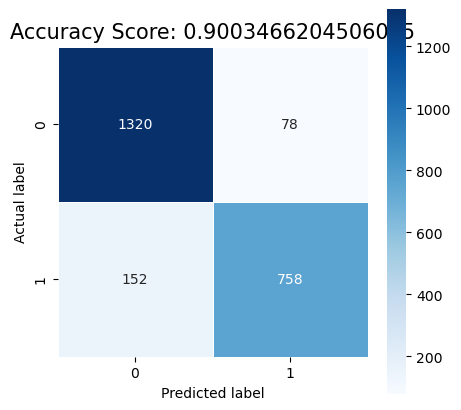

In [18]:
evaluate_model(rforest, x_train, y_train, x_test, y_test)

### GRADIENT BOOSTING CLASSIFIER

In [19]:
GradientBoost = GradientBoostingClassifier(random_state = 42)

**Accuracy Score**
Train Accuracy is: 0.9199653279399017

Test Accuracy is: 0.8990467937608319
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.08003467206009829

Test Error: 0.10095320623916815
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.913517     0.931931  0.919965     0.922724      0.920561
recall        0.961394     0.853097  0.919965     0.907246      0.919965
f1-score      0.936845     0.890773  0.919965     0.913809      0.919220
support    4274.000000  2648.000000  0.919965  6922.000000   6922.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.893847    0.908323  0.899047     0.901085      0.899555
recall        0.945637    0.827473  0.899047     0.886555      0.899047
f1-score      0.919013    0.866015  

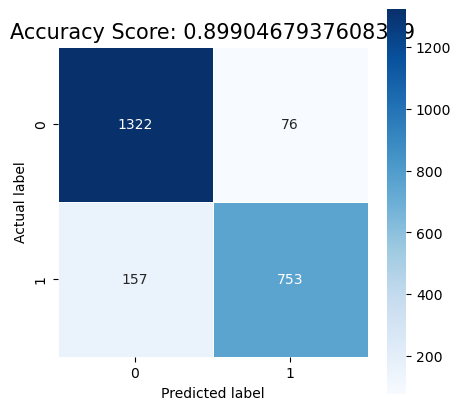

In [20]:
evaluate_model(GradientBoost, x_train, y_train, x_test, y_test)

### LIGHTGBM CLASSIFIER

In [21]:
lgbm = LGBMClassifier(random_state=42)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2648, number of negative: 4274
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 468
[LightGBM] [Info] Number of data points in the train set: 6922, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382548 -> initscore=-0.478746
[LightGBM] [Info] Start training from score -0.478746
**Accuracy Score**
Train Accuracy is: 0.9422132331696041

Test Accuracy is: 0.9020797227036396
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.05778676683039585

Test Error: 0.09792027729636044
---------------------------------------------------------

**Classification Report**
Train Classification Report:
             

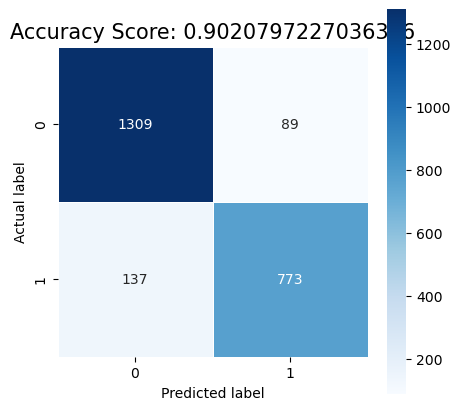

In [22]:
evaluate_model(lgbm, x_train, y_train, x_test, y_test)

### CATBOOST CLASSIFIER

In [23]:
catboost_classif = CatBoostClassifier(random_state=42, silent = True)

**Accuracy Score**
Train Accuracy is: 0.9416353655013002

Test Accuracy is: 0.9007798960138648
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.058364634498699774

Test Error: 0.09922010398613523
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.936597     0.950602  0.941635     0.943600      0.941955
recall        0.971221     0.893882  0.941635     0.932552      0.941635
f1-score      0.953595     0.921370  0.941635     0.937483      0.941268
support    4274.000000  2648.000000  0.941635  6922.000000   6922.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.897890    0.905840   0.90078     0.901865      0.901024
recall        0.943491    0.835165   0.90078     0.889328      0.900780
f1-score      0.920126    0.869068 

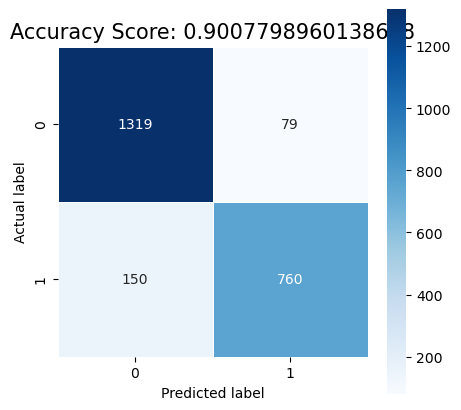

In [24]:
evaluate_model(catboost_classif, x_train, y_train, x_test, y_test)

## Models Evaluation & Performance Benchmarking


#### A) Model Accuracy:

**1) Random Forest:** When it comes to train accuracy, Random Forest have the accuracy of 98.4677% while test accuracy has been declined to 90.03% which is significant drop.

**2) Gradient Boosting:** For train dataset, we have a accuracy score of 90.9350% while for test dataset, we have a accuracy score of 89.97% which is pretty good as there is no much accuracy drop as compared to Random Forest.

**3) LightGBM:** The LightGBM algorithm gives us a train accuracy of 94.282% while test accuracy of 90.549%.

**4) CatBoost:** Under Catboost, we have a train accuracy of 94.05% while test accuracy of 90.918%. In Catboost algorithm, we have the highest test accuracy as compared to Random Forest, Gradient Boosting, LightGBM.

#### B) Model Precision:
**1) Random Forest:** When it comes to train precision for our class labels, we have a precision score of 97.95% for class label "0" and 99.30% for class label "1" while on test dataset this has been reduced. On testing dataset, precision score for class label "0" is coming out to be 91.84% while for class label "1" it is coming out to be 91.42%.

This indicating that our model requires parameters needs to be change as the score has come down significantly on the testing dataset.

**2) Gradient Boosting:** On our training data for class label "0" we have a precision score of 90.71% while for class label "1" we have a precision score of 93.63%,

On testing dataset for our class label "0" this has been increased from 90.71% to 91.37% while for class label "1" this is slightly down i.e; 92.18% but still it is pretty good as compared to Random Forest.

**3) Light GBM:** When it comes to Light GBM, our training precision score for class label "0" is coming out to be 94.12% while for class label "1" it is coming 95.37%.

As far as the testing dataset concern, the precision score of class label "0" is coming out to be 92.11% while for class label "1" it is coming out to be 90.56%.

**4) CatBoost:** Under CatBoost, for class label "0" under training dataset our precision score is coming out to be 93.43% while for class label "1" it is coming out to be 95.15%.

For testing dataset, the precision score class label "0" it is slightly down from 93.43% to 92.07% while for class label "1" it is coming out to be 91.91%.

#### C) F1-Score:

**1) Random Forest:** If we take a look at the F1-Score for Random Forest Classifier on training dataset, it is coming out to be 98.75% for class label "0" while 97.99% for class label "1".

On testing dataset, our F1-score has come down from 98.75% to 93.42% for class label "0" while for class label "1" it is coming out to be 88.73% which is again huge drop.

**2) Gradient Boosting:** On training dataset for class label "0" our F1-score is coming out to be 93.45% while for class label "1" it is coming as 88.80%. For testing dataset, the F1-score for class label "0" has been reduced to 93.42% while for class label "1" it is 88.58%.

**3) LightGBM:** On training dataset for class label "0" our F1-score is coming out to be 95.64% while for class label "1" it is coming as 92.83%. For testing dataset, the F1-score for class label "0" has been reduced to 93.27% while for class label "1" it is 88.62%.

**4) CatBoost:** On training dataset for class label "0" our F1-score is coming out to be 95.23% while for class label "1" it is coming as 92.09%. For testing dataset, the F1-score for class label "0" has been increased to 93.68% while for class label "1" it is 89.17%.

Also when it comes to confusion matrix, we are looking to increase our TP (True Positive) & TN (True Negative) as well as aiming to reduce the FN (False Negative). So for further analysis, we are taking random forest classifier and catboost classifier on which we're going to perform the hyper parameter tuning. 

### Random Forest Hyperparameter Tuning

In [63]:
new_pipeline = Pipeline([('transformer', ct), ('classifier', RandomForestClassifier(random_state=42))])

In [64]:
rf_params = [{
                'classifier': [RandomForestClassifier()],
                'classifier__n_estimators': np.arange(100,2000, 200),
                'classifier__max_depth': [None, 10, 20, 30, 50, 70, 80, 100],
                'classifier__min_samples_split': [2, 3, 5, 7, 10],
                'classifier__min_samples_leaf': [1,2,3,4,5,],
                'classifier__max_features': ['auto', 'sqrt', 'log2'],
                'classifier__bootstrap': [True, False]
               }]

In [65]:
random_search = RandomizedSearchCV(estimator = new_pipeline, param_distributions = rf_params, scoring = 'accuracy', n_jobs = -1, cv = 10, random_state = 42)

In [66]:
best_rf_model = random_search.fit(x_train, y_train)

In [67]:
best_rf_model.best_params_

{'classifier__n_estimators': 1300,
 'classifier__min_samples_split': 3,
 'classifier__min_samples_leaf': 5,
 'classifier__max_features': 'sqrt',
 'classifier__max_depth': None,
 'classifier__bootstrap': True,
 'classifier': RandomForestClassifier()}

In [68]:
print("Best Score: %s" %(best_rf_model.best_score_))

Best Score: 0.9075417678018833


In [73]:
best_rf_model.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('se', StandardScaler(),
                                                  ['Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit',
                                                   'TotalVisits'])])),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=5, min_samples_split=3,
                                        n_estimators=1300))])

In [69]:
rf_classif_pipeline = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(n_estimators = 1300, min_samples_split = 3, min_samples_leaf = 5, max_features = 'sqrt', bootstrap = True, max_depth = None, random_state = 42))])

In [70]:
rf_classif_pipeline.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('se', StandardScaler(),
                                                  ['Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit',
                                                   'TotalVisits'])])),
                ('RandomForest',
                 RandomForestClassifier(min_samples_leaf=5, min_samples_split=3,
                                        n_estimators=1300, random_state=42))])

In [71]:
test_prediction = rf_classif_pipeline.predict(x_test)

In [72]:
accuracy_score(y_test, test_prediction)

0.9003466204506065

In [74]:
def check_metric(y_test, y_predict):
    
    print("**Accuracy Score**")
    test_accuracy = accuracy_score(y_test, y_predict)
    print("\nTest Accuracy is: %s"%(test_accuracy))
    print("---------------------------------------------------------")
    
    print("\n**Accuracy Error**")
    test_error = (1-test_accuracy)
    print("\nTest Error: %s"%(test_error))
    print("---------------------------------------------------------")
    
    print("\n**Classification Report**")
    test_cf_report = pd.DataFrame(classification_report(y_test, y_predict, output_dict = True))
    print("\n Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")
    
    print("\n**Confusion Matrix**")
    test_conf = confusion_matrix(y_test, y_predict)
    print("\n Test Confusion Matrix Report:")
    print((test_conf))

In [75]:
check_metric(y_test, test_prediction)

**Accuracy Score**

Test Accuracy is: 0.9003466204506065
---------------------------------------------------------

**Accuracy Error**

Test Error: 0.09965337954939346
---------------------------------------------------------

**Classification Report**

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.888298    0.922886  0.900347     0.905592      0.901935
recall        0.955651    0.815385  0.900347     0.885518      0.900347
f1-score      0.920744    0.865811  0.900347     0.893278      0.899085
support    1398.000000  910.000000  0.900347  2308.000000   2308.000000
---------------------------------------------------------

**Confusion Matrix**

 Test Confusion Matrix Report:
[[1336   62]
 [ 168  742]]


### Cat Boost Hyperparameter Tuning

In [38]:
cb_new_pipeline = Pipeline([('transformer', ct), ('classifier', CatBoostClassifier(random_state=42, task_type = 'CPU', silent = True, eval_metric = 'accuracy'))])

In [39]:
catboost_params = [{
    'classifier': [CatBoostClassifier()],
    'classifier__iterations': [10],
    'classifier__learning_rate': [0.0001, 0.001, 0.003, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
    'classifier__depth': [2,4,6,8,10,12],
    'classifier__l2_leaf_reg': [2,3,5,7,9,11,12,15,18,20,25,27],
    'classifier__random_strength': [1],
    'classifier__border_count': [50, 100, 150, 200, 254],
}]

In [40]:
cb_random_search = RandomizedSearchCV(estimator = cb_new_pipeline, param_distributions = catboost_params, scoring = 'accuracy', n_jobs = -1, cv = 10, random_state = 42)

In [41]:
cb_random_search.fit(x_train, y_train)

0:	learn: 0.3494654	total: 13.3ms	remaining: 120ms
1:	learn: 0.2930005	total: 20.5ms	remaining: 82ms
2:	learn: 0.2504263	total: 33.3ms	remaining: 77.7ms
3:	learn: 0.2301208	total: 46.1ms	remaining: 69.2ms
4:	learn: 0.2220628	total: 60.9ms	remaining: 60.9ms
5:	learn: 0.2166317	total: 71.9ms	remaining: 48ms
6:	learn: 0.2088395	total: 82.8ms	remaining: 35.5ms
7:	learn: 0.2057938	total: 94.1ms	remaining: 23.5ms
8:	learn: 0.2011455	total: 105ms	remaining: 11.6ms
9:	learn: 0.1980920	total: 115ms	remaining: 0us


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('se',
                                                                               StandardScaler(),
                                                                               ['Total '
                                                                                'Time '
                                                                                'Spent '
                                                                                'on '
                                                                                'Website',
                                                                                'Page '
                                                                                'Views '
                                                                                'Per '
                                                                                'Visit',
                                                                                'TotalVisits'])])),
                                             ('classifier',
                                              <catboost.core.CatBoostClassifier object at 0x0000026D32B431D0>)]),
                   n_jobs=-1,
                   param_distributions=[{'classifier': [<...object at 0x0000026D2FD8AB10>],
                                         'classifier__border_count': [50, 100,
                                                                      150, 200,
                                                                      254],
                                         'classifier__depth': [2, 4, 6, 8, 10,
                                                               12],
                                         'classifier__iterations': [10],
                                         'classifier__l2_leaf_reg': [2, 3, 5, 7,
                                                                     9, 11, 12,
                                                                     15, 18, 20,
                                                                     25, 27],
                                         'classifier__learning_rate': [0.0001,
                                                                       0.001,
                                                                       0.003,
                                                                       0.005,
                                                                       0.01,
                                                                       0.05,
                                                                       0.1, 0.5,
                                                                       1.0],
                                         'classifier__random_strength': [1]}],
                   random_state=42, scoring='accuracy')

In [42]:
cb_random_search.best_params_

{'classifier__random_strength': 1,
 'classifier__learning_rate': 0.5,
 'classifier__l2_leaf_reg': 7,
 'classifier__iterations': 10,
 'classifier__depth': 10,
 'classifier__border_count': 50,
 'classifier': <catboost.core.CatBoostClassifier at 0x26d2fd8ab10>}

In [43]:
cb_random_search.best_score_

0.9091301120202854

In [44]:
catboost_model = CatBoostClassifier(random_strength=1, learning_rate=0.5, l2_leaf_reg=7, iterations=10, depth=10, border_count=50, 
                                    silent = True, eval_metric='Accuracy', task_type='CPU')

In [45]:
catboost_model.fit(x_train, y_train, silent = True, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [46]:
y_test_predict = catboost_model.predict(x_test)

In [47]:
check_metric(y_test, y_test_predict)

**Accuracy Score**

Test Accuracy is: 0.8968804159445407
---------------------------------------------------------

**Accuracy Error**

Test Error: 0.10311958405545929
---------------------------------------------------------

**Classification Report**

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.892954    0.903846   0.89688     0.898400      0.897249
recall        0.942775    0.826374   0.89688     0.884575      0.896880
f1-score      0.917189    0.863375   0.89688     0.890282      0.895971
support    1398.000000  910.000000   0.89688  2308.000000   2308.000000
---------------------------------------------------------

**Confusion Matrix**

 Test Confusion Matrix Report:
[[1318   80]
 [ 158  752]]


## Final Model

In [76]:
random_forest = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(n_estimators = 1300, min_samples_split = 5, min_samples_leaf = 3, max_features = 'sqrt', bootstrap = True, max_depth = None, random_state = 42))])

In [77]:
random_forest.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('se', StandardScaler(),
                                                  ['Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit',
                                                   'TotalVisits'])])),
                ('RandomForest',
                 RandomForestClassifier(min_samples_leaf=3, min_samples_split=5,
                                        n_estimators=1300, random_state=42))])

In [78]:
y_train_predict = random_forest.predict(x_train)

In [79]:
y_test_predict = random_forest.predict(x_test)

In [80]:
print("Train Accuracy: %s"%(accuracy_score(y_train, y_train_predict)))
print("Test Accuracy: %s"%(accuracy_score(y_test, y_test_predict)))

Train Accuracy: 0.9267552730424733
Test Accuracy: 0.9003466204506065
